# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from main import PromptToQueryResult
from services import Service

In [ ]:
await GenerateQuestions()

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-06-23.txt", selectedService=Service.HuggingFace, debug=False)

Rephrased prompt: most sold products#


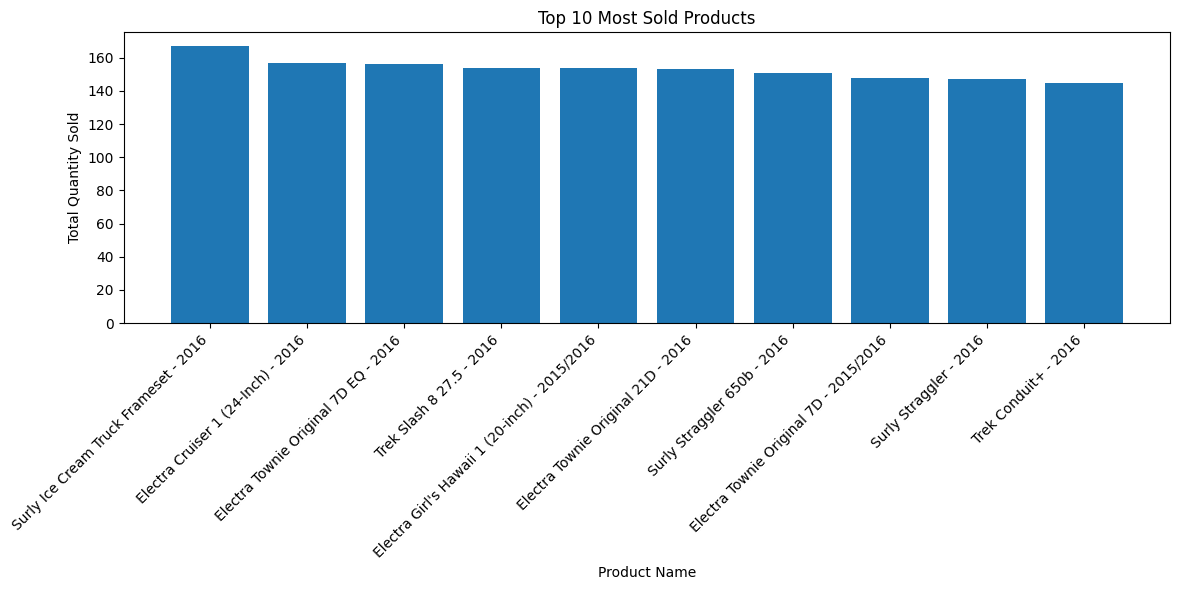

,product_name,total_quantity_sold
0,Surly Ice Cream Truck Frameset - 2016,167
1,Electra Cruiser 1 (24-Inch) - 2016,157
2,Electra Townie Original 7D EQ - 2016,156
3,Trek Slash 8 27.5 - 2016,154
4,Electra Girl's Hawaii 1 (20-inch) - 2015/2016,154
...,...,...
302,Electra Tiger Shark 3i (20-inch) - Boys' - 2018,1
303,"Electra Treasure 3i 20"" - 2018",1
304,Electra Townie Original 21D - 2018,1
305,Electra Townie Balloon 3i EQ - 2017/2018,1


In [18]:
await PromptToQueryResult(prompt_rephrase=False, debug=False ,selected_service=Service.ClaudeAI, huggingface_model="Llama318BInstruct", model_mode="chat")


In [19]:
await PromptToQueryResult(prompt_rephrase=False, debug=False ,selected_service=Service.AzureOpenAI, huggingface_model="Llama318BInstruct", model_mode="chat")

Rephrased prompt: most sold products#


,product_name,total_quantity_sold
0,Electra Cruiser 1 (24-Inch) - 2016,296
1,Electra Townie Original 7D EQ - 2016,290
2,Electra Townie Original 21D - 2016,289
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,269
4,Surly Ice Cream Truck Frameset - 2016,167
...,...,...
273,Electra Straight 8 1 (16-inch) - Boy's - 2018,1
274,Electra Soft Serve 1 (16-inch) - Girl's - 2018,1
275,Electra Cruiser 7D - 2016/2017/2018,1
276,Electra Cruiser 1 Tall - 2016/2018,1


In [20]:
await PromptToQueryResult(prompt_rephrase=True, debug=False ,selected_service=Service.HuggingFace, huggingface_model="Llama318BInstruct", model_mode="chat")

c:\Users\AR002288\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\utils\_deprecation.py:131: FutureWarning: 'InferenceApi' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


User query: most sold products
Rephrased prompt: Recommended Prompt: 
"Create a visual representation to show the top products that have been sold across all stores, highlighting the number of products sold and the total revenue generated from each product category."

Recommended Chart: 
* Bar Chart or Pie Chart to show the top products sold, 
* Line Graph or Area Chart to show the sales trend of the top products over time, 
* Histogram or Box Plot to compare the sales distribution of different product categories.#


,order_id,product_name,total_quantity,total_revenue
0,9,Trek Slash 8 27.5 - 2016,154,615998.46
1,6,Trek Conduit+ - 2016,145,434998.55
2,1,Trek Fuel EX 8 29 - 2016,143,414698.57
3,12,Surly Straggler 650b - 2016,151,253829.49
4,638,Trek Domane SLR 6 Disc - 2017,43,236499.57
5,1,Surly Straggler - 2016,147,227703.00
6,1,Trek Remedy 29 Carbon Frameset - 2016,125,224998.75
7,639,Trek Powerfly 8 FS Plus - 2017,41,204999.59
8,665,Trek Madone 9.2 - 2017,39,194999.61
9,672,Trek Silque SLR 8 Women's - 2017,29,188499.71
